# Triangle de Pascal

In [2]:
import numpy as np

def triangle_pascal(n: int):
    if n == 0: return np.array([1])
    if n == 1: return np.array([1, 1])

    res = np.array([1, 2, 1])
    for i in range(2, n):
        suivant = np.ones(res.size + 1)
        suivant[1:-1] = res[:-1] + res[1:]
        res = suivant
    return res

# Classes utiles
J'ai décidé de créer des classes afin de faciliter l'utilisation des courbes.

In [3]:
import matplotlib.pyplot as plt


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __rmul__(self, r):
        return Point(self.x * r, self.y * r)

    def __add__(self, point):
        return Point(self.x + point.x, self.y + point.y)

    def __radd__(self, r):
        return Point(self.x + r, self.y + r)

    def __repr__(self):
        return "Point [" + str(self.x) + ", " + str(self.y) + "]"

    def __div__(self, other):
        return Point(self.x / other, self.y / other)


class Polygone:
    def __init__(self, points):
        self.points = points

    def __getitem__(self, item):
        return self.points[item]

    def __len__(self):
        return len(self.points)

    def plot(self):
        xs = []
        ys = []
        for point in self.points:
            xs.append(point.x)
            ys.append(point.y)
        plt.plot(xs, ys, ".r")
        plt.plot(xs, ys, "-c")


class Bezier:
    def __init__(self, polygone: Polygone):
        self.degres = len(polygone) - 1
        self.polygone = polygone

        self.pascal = triangle_pascal(self.degres)

        def B(i, u):
            return self.pascal[i] * u**i * (1 - u)**(self.degres - i)
        self.B = B

    def p(self, u):
        res = Point(0, 0)
        for i in range(self.degres + 1):
            res = res + self.B(i, u) * self.polygone[i]
        return res

    def plot(self, pas):
        xs = []
        ys = []
        for u in np.arange(0, 1 + pas, pas):
            res = self.p(u)
            xs.append(res.x)
            ys.append(res.y)

        plt.plot(xs, ys, "-m")


class BezierCubique:
    def __init__(self):
        self.beziers = []

    def addBezier(self, bezier):
        self.beziers.append(bezier)

    def plot(self, pas):
        for bezier in self.beziers:
            xs = []
            ys = []
            for u in np.arange(0, 1 + pas, pas):
                res = bezier.p(u)
                xs.append(res.x)
                ys.append(res.y)

            plt.plot(xs, ys, "-m")


class BezierCubiqueC1:
    def __init__(self, polygone: Polygone):
        self.beziers = []

        pts = []
        for i, point in enumerate(polygone):
            if len(pts) == 3 and len(polygone) > i:
                p = Point(polygone[i - 1].x + polygone[i].x, polygone[i - 1].y + polygone[i].y)
                p = Point(p.x / 2.0, p.y / 2.0)
                pts.append(p)
                self.beziers.append(Bezier(Polygone(pts)))
                pts = [p]
            pts.append(point)

    def plot(self, pas):
        for bezier in self.beziers:
            xs = []
            ys = []
            for u in np.arange(0, 1 + pas, pas):
                res = bezier.p(u)
                xs.append(res.x)
                ys.append(res.y)

            plt.plot(xs, ys, "-m")

# Courbe simple
Implémentation de la courbe de Bézier sur un polygone simple Pour vérifier que tout fonctionne.

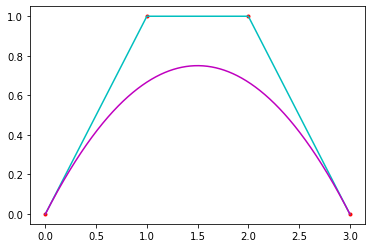

In [4]:
points = [
    Point(0, 0),
    Point(1, 1),
    Point(2, 1),
    Point(3, 0),
]

pol = Polygone(points)
bez = Bezier(pol)

plt.figure()
pol.plot()
bez.plot(0.001)
plt.show()

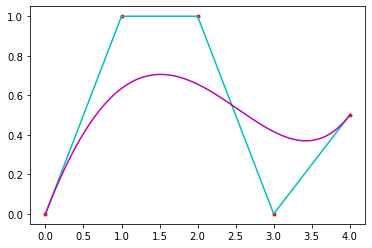

In [5]:
points1 = [
    Point(0, 0),
    Point(1, 1),
    Point(2, 1),
    Point(3, 0),
    Point(4, 0.5),
]

pol1 = Polygone(points1)
bez1 = Bezier(pol1)

plt.figure()
pol1.plot()
bez1.plot(0.001)
plt.show()

# Tracé complexe
Polygone avec au moins 13 points de contrôle.

## Avec Bezier classique

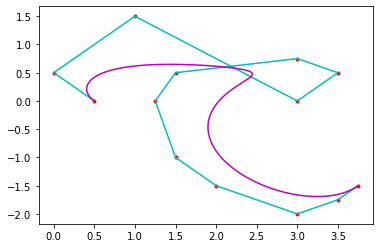

In [6]:
points2 = [
    Point(0.5, 0),
    Point(0, 0.5),
    Point(1, 1.5),
    Point(3, 0),
    Point(3.5, 0.5),
    Point(3, 0.75),
    Point(1.5, 0.5),
    Point(1.25, 0),
    Point(1.5, -1),
    Point(2, -1.5),
    Point(3, -2),
    Point(3.5, -1.75),
    Point(3.75, -1.5),
]

pol2 = Polygone(points2)
bez2 = Bezier(pol2)

plt.figure()
pol2.plot()
bez2.plot(0.001)
plt.show()

## Avec Bezier cubiques par morceaux

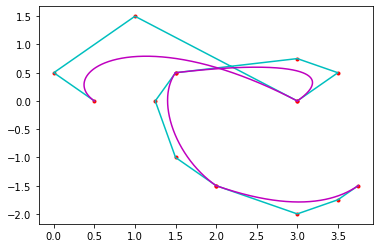

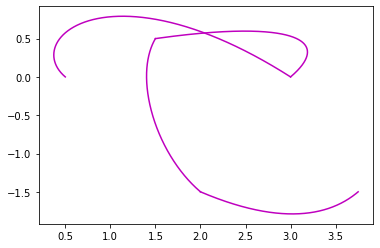

In [7]:
points3_1 = [
    Point(0.5, 0),
    Point(0, 0.5),
    Point(1, 1.5),
    Point(3, 0),
]
points3_2 = [
    Point(3, 0),
    Point(3.5, 0.5),
    Point(3, 0.75),
    Point(1.5, 0.5),
]

points3_3 = [
    Point(1.5, 0.5),
    Point(1.25, 0),
    Point(1.5, -1),
    Point(2, -1.5),
]

points3_4 = [
    Point(2, -1.5),
    Point(3, -2),
    Point(3.5, -1.75),
    Point(3.75, -1.5),
]

bezCubique1 = BezierCubique()
bezCubique1.addBezier(Bezier(Polygone(points3_1)))
bezCubique1.addBezier(Bezier(Polygone(points3_2)))
bezCubique1.addBezier(Bezier(Polygone(points3_3)))
bezCubique1.addBezier(Bezier(Polygone(points3_4)))

polygoneTotal = Polygone(points3_1 + points3_2 + points3_3 + points3_4)

plt.figure()
polygoneTotal.plot()
bezCubique1.plot(0.001)
plt.show()

plt.figure()
bezCubique1.plot(0.001)
plt.show()

# Test sur un autre polygone

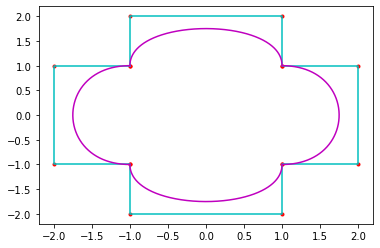

In [8]:
points4_1 = [
    Point(-1, 1),
    Point(-1, 2),
    Point(1, 2),
    Point(1, 1),
]
points4_2 = [
    Point(1, 1),
    Point(2, 1),
    Point(2, -1),
    Point(1, -1),
]

points4_3 = [
    Point(1, -1),
    Point(1, -2),
    Point(-1, -2),
    Point(-1, -1),
]

points4_4 = [
    Point(-1, -1),
    Point(-2, -1),
    Point(-2, 1),
    Point(-1, 1),
]

bezCubique2 = BezierCubique()
bezCubique2.addBezier(Bezier(Polygone(points4_1)))
bezCubique2.addBezier(Bezier(Polygone(points4_2)))
bezCubique2.addBezier(Bezier(Polygone(points4_3)))
bezCubique2.addBezier(Bezier(Polygone(points4_4)))

polygoneTotal = Polygone(points4_1 + points4_2 + points4_3 + points4_4)
polygoneTotal.plot()
bezCubique2.plot(0.001)

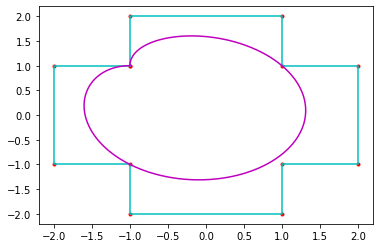

In [9]:
points5 = [
    Point(-1, 1),
    Point(-1, 2),
    Point(1, 2),
    Point(1, 1),
    Point(2, 1),
    Point(2, -1),
    Point(1, -1),
    Point(1, -2),
    Point(-1, -2),
    Point(-1, -1),
    Point(-2, -1),
    Point(-2, 1),
    Point(-1, 1),
]

pol5 = Polygone(points5)
bez5 = Bezier(pol5)

plt.figure()
pol5.plot()
bez5.plot(0.001)
plt.show()

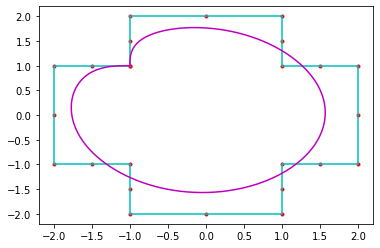

In [10]:
points6 = [
    Point(-1, 1),
    Point(-1, 1.5),
    Point(-1, 2),
    Point(0, 2),
    Point(1, 2),
    Point(1, 1.5),
    Point(1, 1),
    Point(1.5, 1),
    Point(2, 1),
    Point(2, 0),
    Point(2, -1),
    Point(1.5, -1),
    Point(1, -1),
    Point(1, -1.5),
    Point(1, -2),
    Point(0, -2),
    Point(-1, -2),
    Point(-1, -1.5),
    Point(-1, -1),
    Point(-1.5, -1),
    Point(-2, -1),
    Point(-2, 0),
    Point(-2, 1),
    Point(-1.5, 1),
    Point(-1, 1),
]

pol6 = Polygone(points6)
bez6 = Bezier(pol6)

plt.figure()
pol6.plot()
bez6.plot(0.001)
plt.show()

# Connexités C0 - C1
La connexité C1 permet d'avoir des courbes lisses. Contrairement à la connexité C0 qui aura des angles.

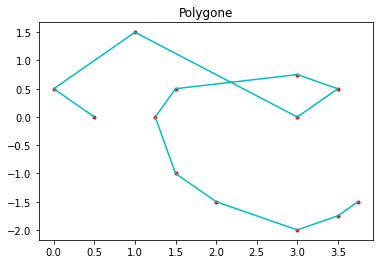

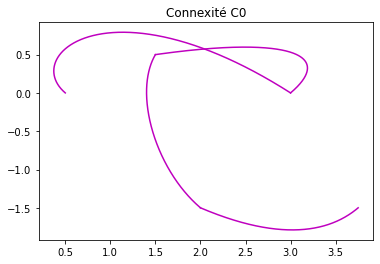

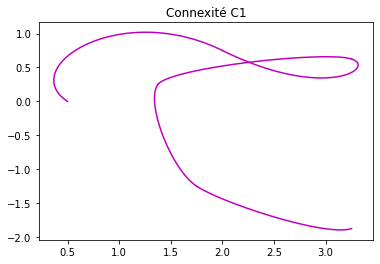

In [15]:
bez7 = BezierCubiqueC1(points2)

plt.figure()
plt.title("Polygone")
pol2.plot()
plt.show()

plt.figure()
plt.title("Connexité C0")
bezCubique1.plot(0.001)
plt.show()

plt.figure()
plt.title("Connexité C1")
bez7.plot(0.01)
plt.show()

# Différences entre Bézier classique et par morceaux
Quand on a beaucoup de points de contrôles, le Bézier classique ne permet pas d'épouser la forme souhaité, il est donc nécessaire d'utiliser le Bézier par morceaux comme dans l'exemple ci-dessous.

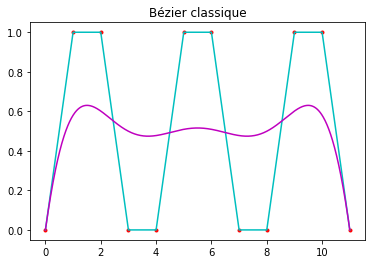

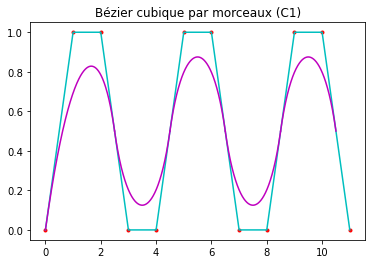

In [17]:
points7 = [
    Point(0, 0),
    Point(1, 1),
    Point(2, 1),
    Point(3, 0),
    Point(4, 0),
    Point(5, 1),
    Point(6, 1),
    Point(7, 0),
    Point(8, 0),
    Point(9, 1),
    Point(10, 1),
    Point(11, 0),
]

pol7 = Polygone(points7)
bez8 = Bezier(pol7)

plt.figure()
plt.title("Bézier classique")
pol7.plot()
bez8.plot(0.001)
plt.show()

bez9 = BezierCubiqueC1(points7)

plt.figure()
plt.title("Bézier cubique par morceaux (C1)")
pol7.plot()
bez9.plot(0.001)
plt.show()

# Tentative de dessiner un cercle
Il est plutôt difficile de dessiner un cercle avec Bézier.

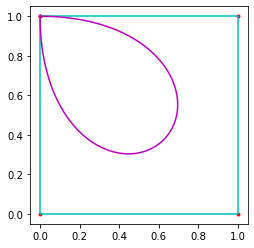

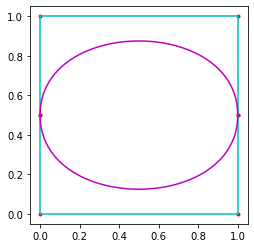

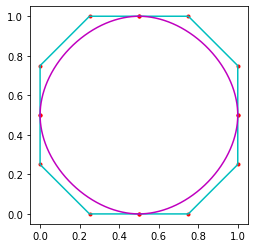

In [13]:
points8 = [
    Point(0, 1),
    Point(1, 1),
    Point(1, 0),
    Point(0, 0),
    Point(0, 1),
]

points9_1 = [
    Point(0, 0.5),
    Point(0, 1),
    Point(1, 1),
    Point(1, 0.5),
]

points9_2 = [
    Point(1, 0.5),
    Point(1, 0),
    Point(0, 0),
    Point(0, 0.5),
]

points10_1 = [
    Point(0, 0.5),
    Point(0, 0.75),
    Point(0.25, 1),
    Point(0.5, 1),
]

points10_2 = [
    Point(0.5, 1),
    Point(0.75, 1),
    Point(1, 0.75),
    Point(1, 0.5),
]

points10_3 = [
    Point(1, 0.5),
    Point(1, 0.25),
    Point(0.75, 0),
    Point(0.5, 0),
]

points10_4 = [
    Point(0.5, 0),
    Point(0.25, 0),
    Point(0, 0.25),
    Point(0, 0.5),
]

pol8 = Polygone(points8)
pol9 = Polygone(points9_1 + points9_2)
pol10 = Polygone(points10_1 + points10_2 + points10_3 + points10_4)

bez10 = Bezier(pol8)

bezCubique11 = BezierCubique()
bezCubique11.addBezier(Bezier(Polygone(points9_1)))
bezCubique11.addBezier(Bezier(Polygone(points9_2)))

bezCubique12 = BezierCubique()
bezCubique12.addBezier(Bezier(Polygone(points10_1)))
bezCubique12.addBezier(Bezier(Polygone(points10_2)))
bezCubique12.addBezier(Bezier(Polygone(points10_3)))
bezCubique12.addBezier(Bezier(Polygone(points10_4)))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
pol8.plot()
bez10.plot(0.001)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
pol9.plot()
bezCubique11.plot(0.001)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
pol10.plot()
bezCubique12.plot(0.001)
plt.show()